/var/folders/bv/5yzv5x3d5sb44fl8wn3sdr540000gn/T/ipykernel_71083/3217211228.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data1['Classification'].iloc[mt]= 'def_Up'
/var/folders/bv/5yzv5x3d5sb44fl8wn3sdr540000gn/T/ipykernel_71083/32172

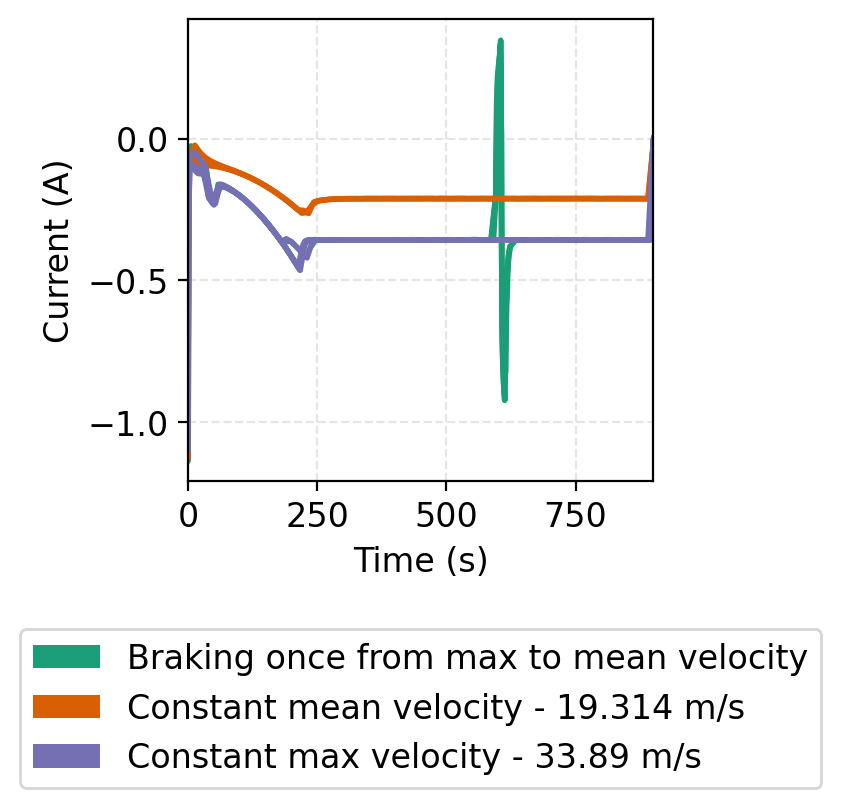

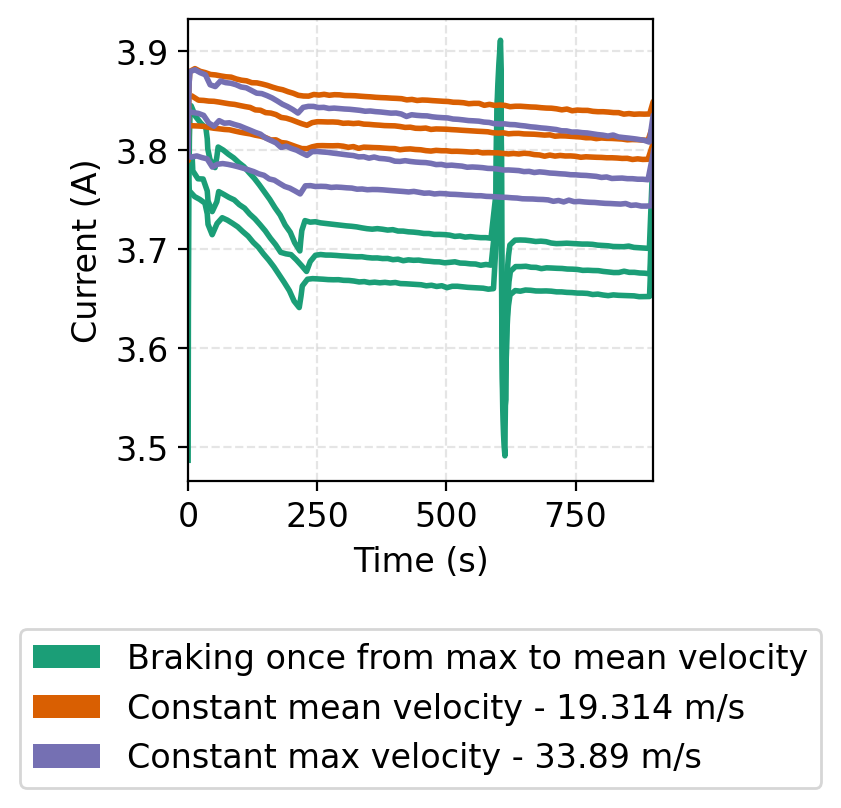

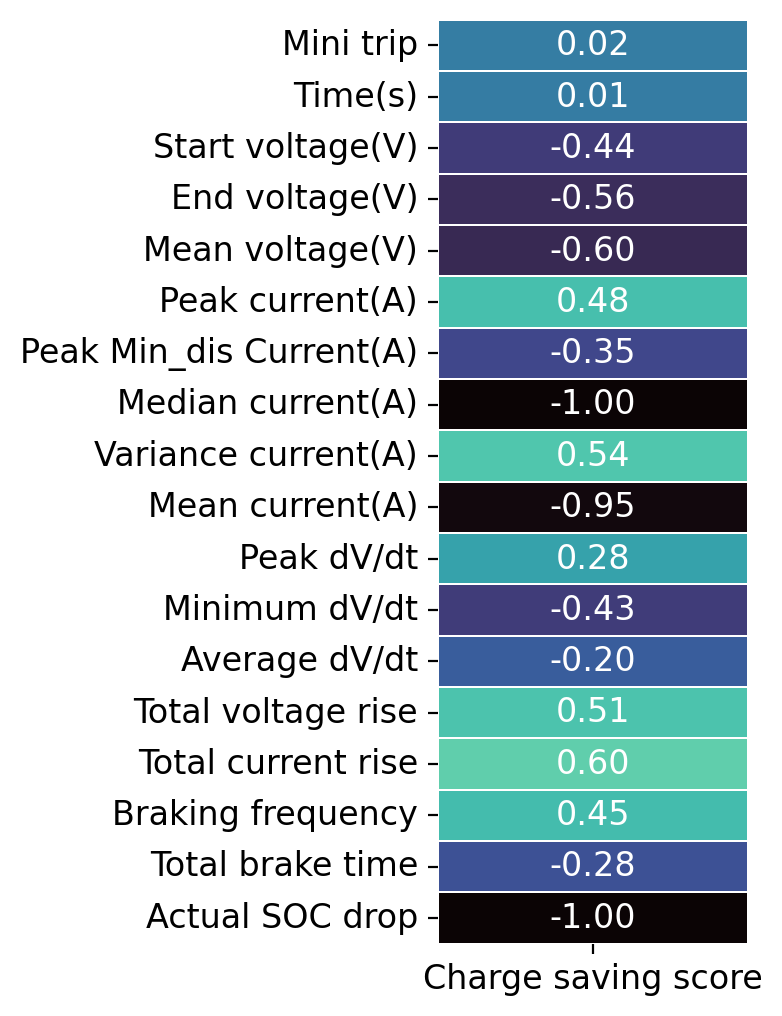

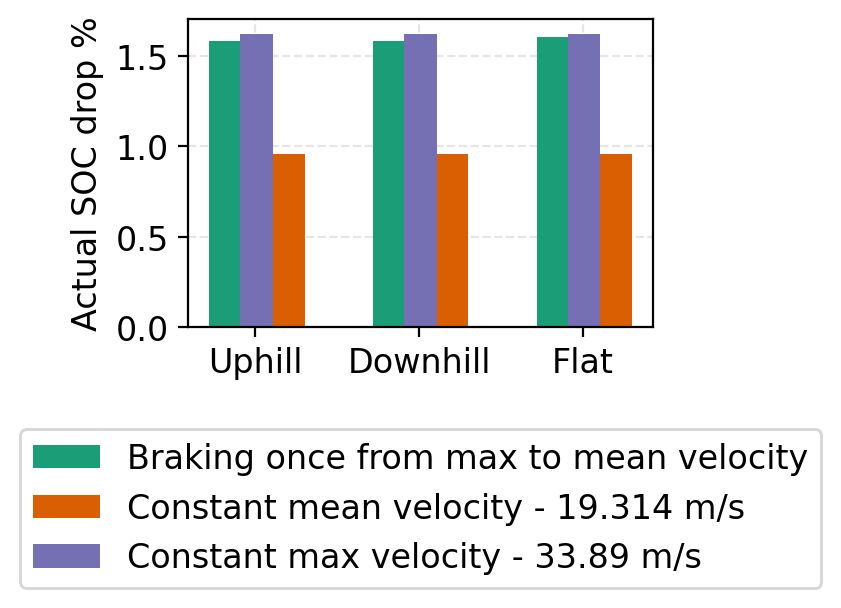

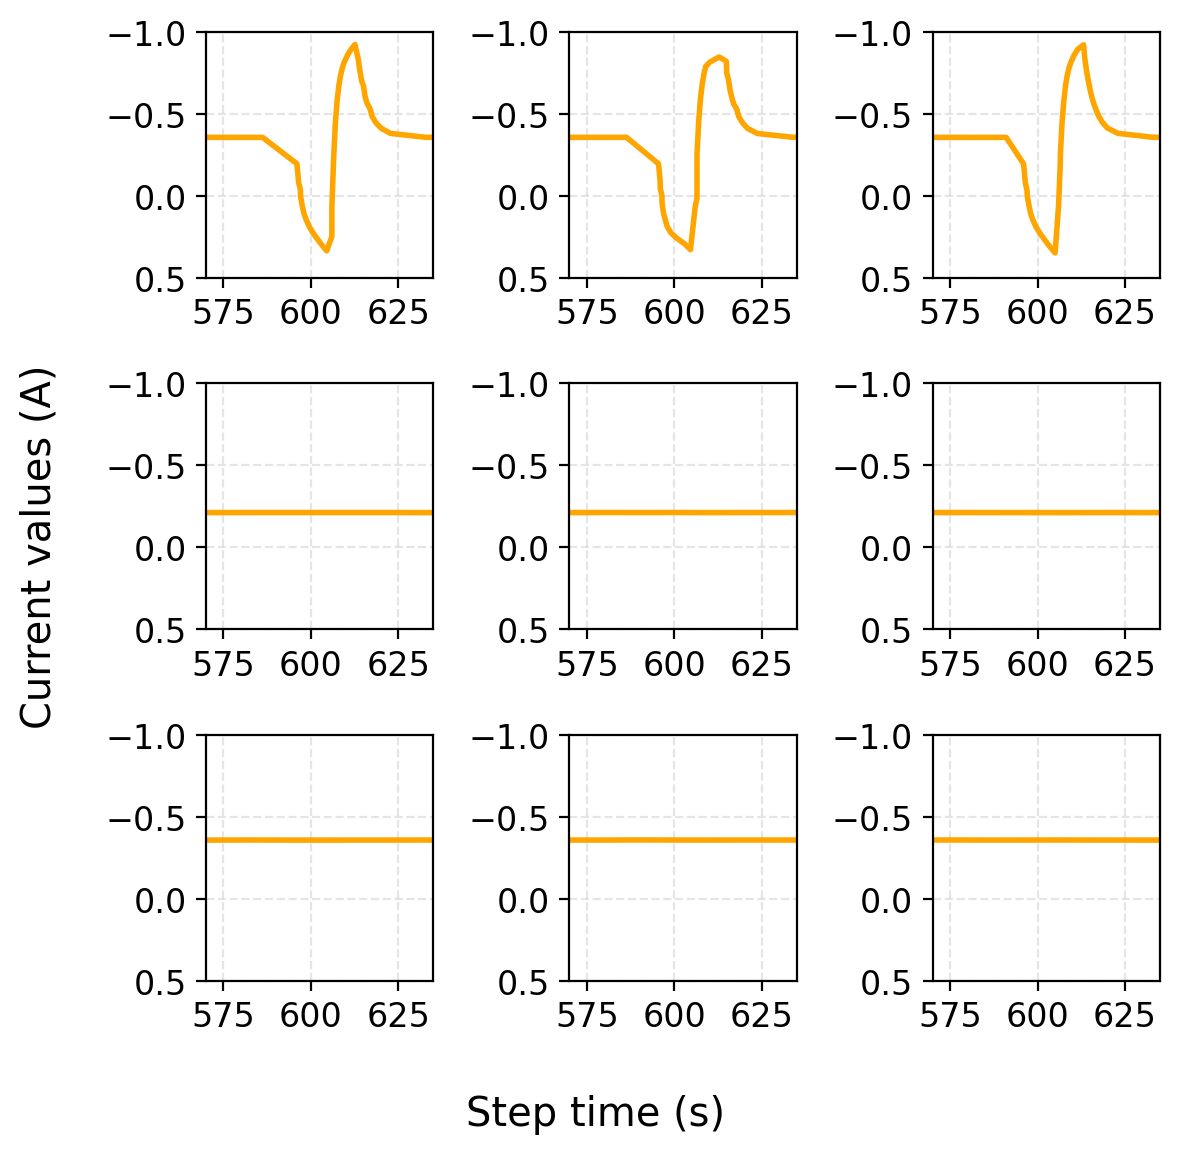

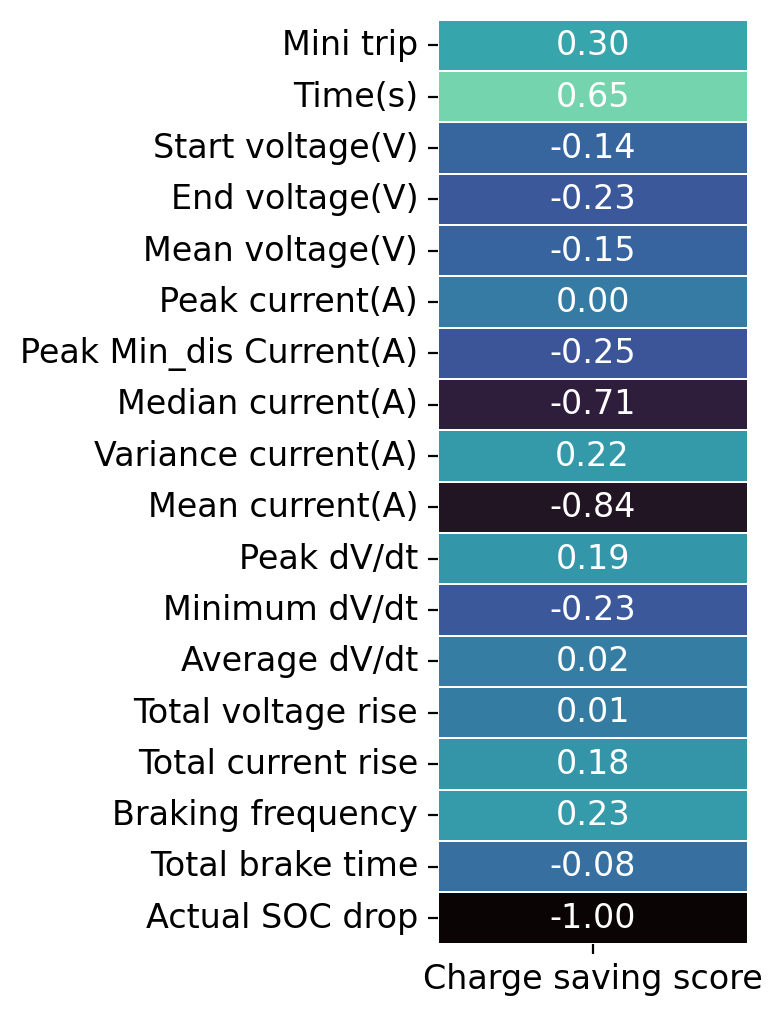

In [1]:
%run Database_create.ipynb

In [2]:
cut_dict={}
data_list=[]
for key in dict.keys():
    datafr= cut_time(dict[key], 300, 800)  ##Function to select the time limit till what we want to cut down the data to
    data_list.append(datafr)
cut_dict={f'Minitrip{i+1}': dataf for i, dataf in enumerate(data_list)}

In [3]:
cut_data= features_ext(cut_dict)
cut_data

,Mini Trip,Time(s),Start Voltage(V),End Voltage(V),Mean Voltage(V),Peak Current(A),Peak Min_dis Current(A),Median Current(A),Variance Current(A),Mean Current(A),Peak dV/dt,Min dV/dt,Avg dV/dt,Total Voltage Rise,Total Current Rise,Number of brakes,Total brake time,SOC_drop (%),Relative_SOC_drop
0,1,498.2785,3.853367,3.846318,3.861675,-0.029862,-0.371565,-0.290050,0.009414,-0.253142,0.123397,-0.023892,0.005853,0.186998,0.567164,5,97.5667,-1.191021,43.347273
1,2,482.1791,3.825440,3.809607,3.821051,-0.182461,-0.379497,-0.339989,0.001335,-0.334662,0.177656,-0.009023,0.014297,0.140256,0.181788,11,55.5689,-1.513181,55.072293
2,3,494.4990,3.836214,3.813374,3.819919,-0.178817,-0.359104,-0.295083,0.001730,-0.286618,0.123892,-0.033125,0.005682,0.088951,0.190125,6,110.8469,-1.315709,47.885274
3,4,489.5848,3.797720,3.769630,3.795607,-0.223990,-0.537201,-0.301091,0.003937,-0.320272,0.127078,-0.048424,0.007324,0.220503,0.480560,10,125.6504,-1.395912,50.804263
4,5,496.6855,3.796045,3.792684,3.802303,-0.024798,-0.385378,-0.280622,0.007163,-0.248240,0.112828,-0.008812,0.003414,0.193436,0.540549,5,138.7872,-1.111199,40.442126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,496.5359,3.755281,3.754886,3.760149,-0.123577,-0.450002,-0.294712,0.004241,-0.292415,0.045183,-0.006593,0.001401,0.058041,0.655351,11,44.4544,-1.333945,48.548993
92,93,487.6598,3.740973,3.717616,3.723380,-0.218840,-0.568212,-0.332925,0.005091,-0.342327,0.117966,-0.074499,0.004474,0.248783,0.619432,10,109.9773,-1.475639,53.705953
93,94,491.2119,3.703782,3.698575,3.677905,-0.166904,-0.818060,-0.357337,0.021922,-0.365208,0.112069,-0.182226,-0.001767,0.285242,0.697462,12,162.9329,-1.413562,51.446644
94,95,484.1548,3.688385,3.656023,3.678666,-0.107694,-0.533918,-0.298938,0.007495,-0.307075,0.115814,-0.039049,0.002050,0.255891,0.678438,9,116.4045,-1.333642,48.537965


In [4]:
def cut_by_perc(df, parameter, perc):  
    timediff_arr=[]
    val_arr=[]
    time_cut=0
    for i in range (1,len(df)):
        val= df[parameter].iloc[i]
        val_arr.append(val)
        timediff= (df['Step Time (s)'].iloc[i])- (df['Step Time (s)'].iloc[i-1])
        timediff_arr.append(timediff)
    timediffnp= np.array(timediff_arr)
    valnp= np.array(val_arr)
    perc_value= np.percentile(valnp, perc)
    
    for j in range (len(val_arr)):
        if valnp[j]<= perc_value:
            time_cut= time_cut+ (timediffnp[j])
    limited_data = df[df['Step Time (s)'] <= time_cut]
    return limited_data

In [5]:
train_dict={}
train_list=[]
for key in dict.keys():
    datafr_perc= cut_by_perc(dict[key], 'Current (A)', 50)  ##Function to select the percentile and parameter (Voltage or Current) limit till what we want to cut down the data to
    train_list.append(datafr_perc)
train_dict={f'Minitrip{a+1}': dataf_perc for a, dataf_perc in enumerate(train_list)}

In [6]:
training_data_perc= features_ext(train_dict)
training_data_perc

,Mini Trip,Time(s),Start Voltage(V),End Voltage(V),Mean Voltage(V),Peak Current(A),Peak Min_dis Current(A),Median Current(A),Variance Current(A),Mean Current(A),Peak dV/dt,Min dV/dt,Avg dV/dt,Total Voltage Rise,Total Current Rise,Number of brakes,Total brake time,SOC_drop (%),Relative_SOC_drop
0,1,453.5633,3.625744,3.846709,3.873936,-0.015272,-1.126501,-0.196777,0.052357,-0.246411,0.116538,-0.032355,0.002824,0.100869,0.056920,4,92.3426,-0.913191,33.235638
1,2,423.1543,3.635924,3.825420,3.852648,-0.022005,-1.125478,-0.270782,0.034283,-0.265150,0.177656,-0.027619,0.009774,0.053272,0.039119,4,20.0010,-0.899843,32.749821
2,3,422.2608,3.618710,3.848245,3.842567,-0.022182,-1.129457,-0.213067,0.027167,-0.234926,0.121035,-0.033125,0.003717,0.153683,0.256025,9,50.9342,-0.796263,28.980012
3,4,364.8449,3.797764,3.809974,3.830309,-0.018094,-1.126538,-0.213709,0.030128,-0.230818,0.193953,-0.029975,0.006876,0.122770,0.080908,5,57.2112,-0.687960,25.038332
4,5,373.7922,3.878416,3.796141,3.830506,-0.042241,-0.329984,-0.183771,0.008188,-0.193870,0.003882,-0.027416,-0.001314,0.078874,0.056338,4,20.0018,-0.677772,24.667541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,435.0098,3.793411,3.760252,3.774471,-0.064869,-0.450002,-0.244128,0.010734,-0.231285,0.002300,-0.009785,-0.000354,0.037269,0.429884,5,61.6488,-0.934447,34.009241
92,93,405.0462,3.852625,3.748124,3.784864,-0.034600,-0.368091,-0.203246,0.011652,-0.213440,0.011016,-0.033184,-0.002242,0.098987,0.105407,7,39.2149,-0.854402,31.095999
93,94,403.6022,3.801919,3.688167,3.708147,-0.030949,-0.818060,-0.231803,0.042332,-0.290412,0.035065,-0.182226,-0.005061,0.265821,0.607418,4,81.5121,-0.815128,29.666622
94,95,419.6681,3.777717,3.684173,3.719077,-0.034695,-0.379126,-0.207428,0.008574,-0.206584,0.014724,-0.039049,-0.001673,0.143321,0.253471,4,57.0597,-0.824725,30.015915


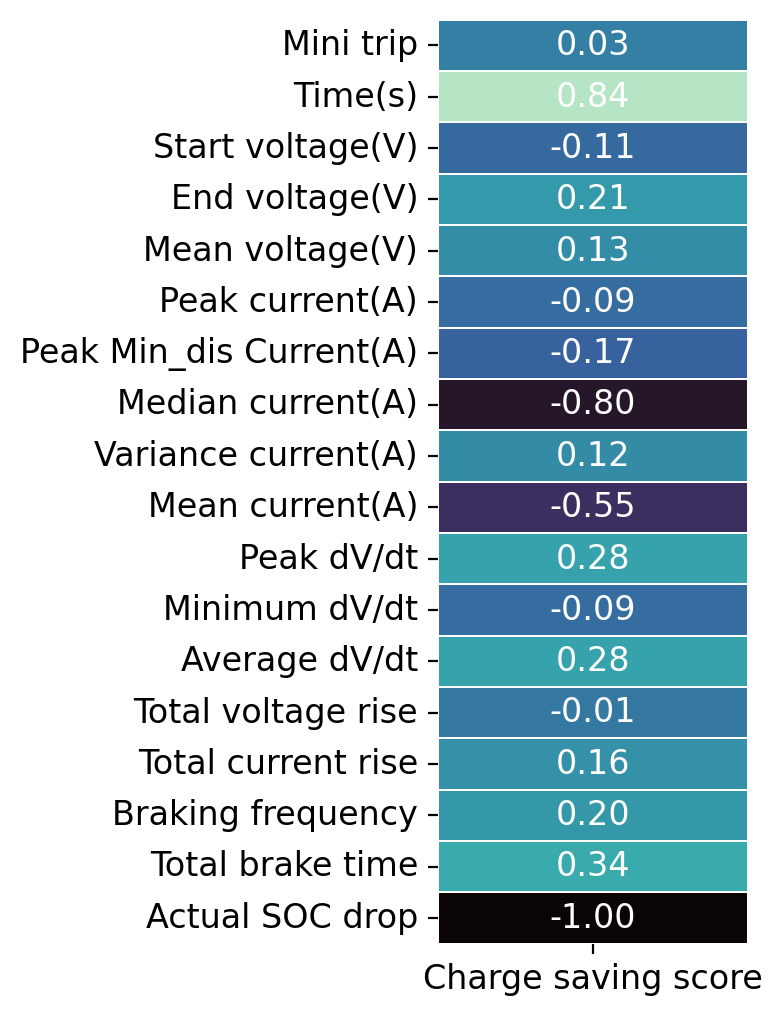

In [7]:
corr_map(training_data_perc)